Graphviz Playground
==

Reference
--
[Graphviz DOT Lang Edge Attributs](https://graphviz.org/docs/edges/)

In [2]:
import logging
import graphviz
logging.basicConfig(format='[%(levelname)s@%(name)s] %(message)s', level=logging.DEBUG)
graphviz.__version__, graphviz.version()

[DEBUG@graphviz.backend.execute] run [PosixPath('dot'), '-V']


('0.20.1', (2, 43, 0))

In [3]:
src = graphviz.Source("""digraph {
    graph [rankdir=LR]
    
    subgraph cluster_outer {
        label="Outer Box"
        style="rounded"
        
        subgraph cluster_inner {
            label="Inner Box"
            style="rounded"
            
            A [label="Node A"]
            B [label="Node B"]
        }
    }
}""")

[DEBUG@graphviz.backend.execute] run [PosixPath('dot'), '-Kdot', '-Tsvg']


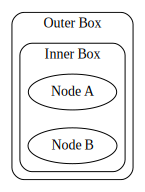

In [4]:
src


[DEBUG@graphviz.backend.execute] run [PosixPath('dot'), '-Kdot', '-Tsvg']


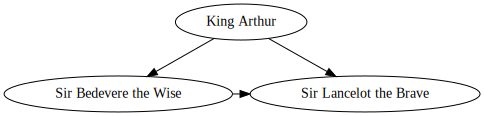

In [3]:
dot = graphviz.Digraph(comment='The Round Table')

dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')

dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')

dot

[DEBUG@graphviz.backend.execute] run [PosixPath('dot'), '-Kdot', '-Tsvg']


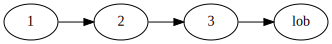

In [4]:
src = graphviz.Source('digraph "the holy hand grenade" { rankdir=LR; 1 -> 2 -> 3 -> lob }')
src

[DEBUG@graphviz.backend.execute] run [PosixPath('dot'), '-Kdot', '-Tsvg']


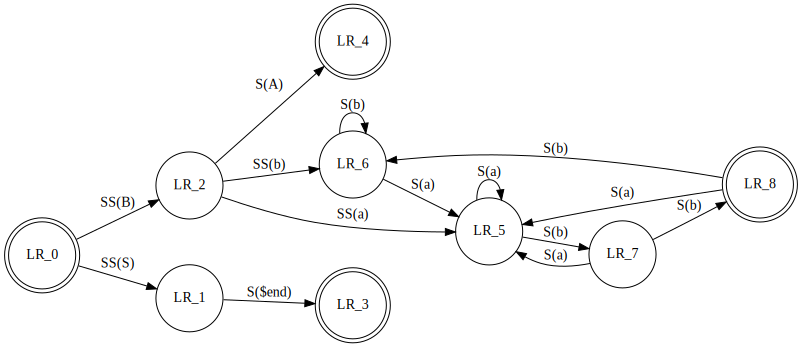

In [5]:
# http://www.graphviz.org/content/fsm

f = graphviz.Digraph('finite_state_machine', filename='fsm.gv')

f.attr(rankdir='LR', size='30,30')

f.attr('node', shape='doublecircle')
f.node('LR_0')
f.node('LR_3')
f.node('LR_4')
f.node('LR_8')

f.attr('node', shape='circle')
f.edge('LR_0', 'LR_2', label='SS(B)')
f.edge('LR_0', 'LR_1', label='SS(S)')
f.edge('LR_1', 'LR_3', label='S($end)')
f.edge('LR_2', 'LR_6', label='SS(b)')
f.edge('LR_2', 'LR_5', label='SS(a)')
f.edge('LR_2', 'LR_4', label='S(A)')
f.edge('LR_5', 'LR_7', label='S(b)')
f.edge('LR_5', 'LR_5', label='S(a)')
f.edge('LR_6', 'LR_6', label='S(b)')
f.edge('LR_6', 'LR_5', label='S(a)')
f.edge('LR_7', 'LR_8', label='S(b)')
f.edge('LR_7', 'LR_5', label='S(a)')
f.edge('LR_8', 'LR_6', label='S(b)')
f.edge('LR_8', 'LR_5', label='S(a)')

f

[DEBUG@graphviz.backend.execute] run [PosixPath('dot'), '-Kdot', '-Tsvg']


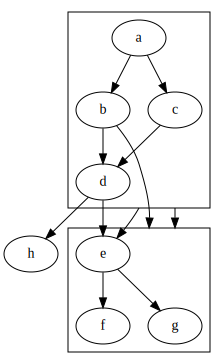

In [6]:
# http://www.graphviz.org/pdf/dotguide.pdf, Figure 20

g = graphviz.Digraph('G', filename='cluster_edge.gv')

g.attr(compound='true')

with g.subgraph(name='cluster0') as c:
    c.edges(['ab', 'ac', 'bd', 'cd'])

with g.subgraph(name='cluster1') as c:
    c.edges(['eg', 'ef'])

g.edge('b', 'f', lhead='cluster1')
g.edge('d', 'e')
g.edge('c', 'g', ltail='cluster0', lhead='cluster1')
g.edge('c', 'e', ltail='cluster0')
g.edge('d', 'h')

g

In [41]:
tree = {"root":
        {
            "trunk 1":
            {
                "branch 1A": [1,2,3]
            },
            "trunk 2":
            {
                "branch 2A": [4,5,6]
            },
            "trunk 3":
            {
                "branch 3A": [7,8,9]
            },
        }
       }

In [56]:
quot='"'
def branchprint(branch, parent=None):
    src = ""
    for each in branch:
        src = src + f"{(quot+parent+quot+' -> ') if parent != None else ''}{quot}{each}{quot}" + '\n'     
        if hasattr(branch,'keys'):
            if hasattr(branch[each],'__iter__'):
                src = src + branchprint(branch[each], each)
    return src
    
def treeprint(tree):
    src = "Digraph {"
    src = src + branchprint(tree)
    src = src + "}"
    return src


In [57]:
source = treeprint(tree)

In [58]:
grph = graphviz.Source(source)

[DEBUG@graphviz.backend.execute] run [PosixPath('dot'), '-Kdot', '-Tsvg']


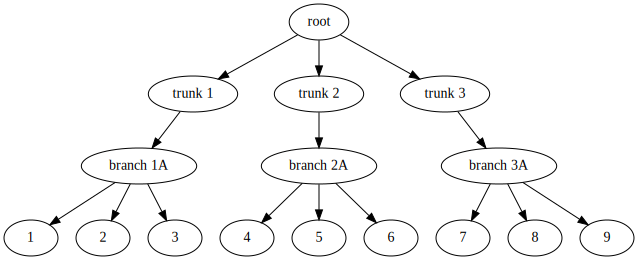

In [59]:
grph

In [2]:
source = """digraph organization {
    rankdir=LR;

    node [shape=rectangle, style=filled, fontname=Arial];
    edge [arrowhead=vee];

    CEO [fillcolor=crimson];
    CTO [fillcolor=darkgreen];
    VP_DX [fillcolor=darkgreen];
    DX_Samurai [fillcolor=limegreen];
    CFO [fillcolor=darkorange];
    Billing_Specialist [fillcolor=lightcoral];
    CPA [fillcolor=dodgerblue];
    Book_Keeper [fillcolor=skyblue];
    COO [fillcolor=goldenrod];
    Factory_Supervisor [fillcolor=chocolate];
    Equipment_Operator [fillcolor=peachpuff];

    {rank=same; CEO; CTO; CFO; COO;}

    CEO -> CTO;
    CTO -> VP_DX;
    VP_DX -> DX_Samurai;
    CFO -> Billing_Specialist;
    CFO -> CPA;
    CPA -> Book_Keeper;
    COO -> Factory_Supervisor;
    Factory_Supervisor -> Equipment_Operator;
}"""

In [20]:
source = '''
digraph hierarchy {
  rankdir=LR; // Left to Right direction

  // Nodes
  CEO [label="Raygan Henley\nCEO\nLead Programmer" shape=box style=rounded]
  VP [label="Gary Little\nVice President\nProgrammer" shape=box style=rounded]
  JohnWayne [label="John Wayne\nProgrammer" shape=box style=rounded]
  AndreaMacFarlan [label="Andrea MacFarlan\nProgrammer" shape=box style=rounded]

  // Edges
  CEO -> VP [color=blue constraint=false]
  CEO -> JohnWayne [color=green]
  CEO -> AndreaMacFarlan [color=green]
  VP -> JohnWayne [color=green]
  VP -> AndreaMacFarlan [color=green]

  // Color arrows between Lead Programmer and Programmer
  {rank=same; CEO VP}
  Lead -> JohnWayne [color=orange]
  Lead -> AndreaMacFarlan [color=orange]
}

'''

In [21]:
orgchart = graphviz.Source(source)

[DEBUG@graphviz.backend.execute] run [PosixPath('dot'), '-Kdot', '-Tsvg']


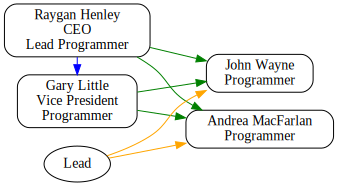

In [22]:
orgchart

In [1]:
%pip install graphviz
%pip install plantuml

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
